#  PROJET D'ANALYSE NUMERIQUE 2018-2019

            #   THEME: ENVIRONNEMENT
    Le rechauffement climatique et les emissions de CO2

            ##  Objectifs:
    Montrer que le rechauffement climatique dépend principalement de l augmentation irreversible du CO2 emis suites aux activités de l homme dans l l atmosphere.

            ##   Description de données:
    Les données sont composées de deux colonnes comportant respectivement le volume de CO2 dans l atmosphere et les variations de temperature de la planete terre de 1959 a 2016.

            ##   Source de données: 
Global temperature from https://www.ncdc.noaa.gov/cag/data-info/global Global temperature anomaly data come from the Global Historical Climatology Network-Monthly (GHCN-M) data set and International Comprehensive Ocean-Atmosphere Data Set (ICOADS), which have data from 1880 to the present

##    Importation et visualisation de données

In [1]:
            #Importation et visualisation de données
import pandas, numpy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df = pandas.read_csv("climate-change-2016.txt", sep="\t", encoding="utf8")
print(df.shape)
df.head()


(58, 4)


,year,Global_temp_anomaly,CO2(ppm),DJIA
0,1959,0.0596,315.97,679.36
1,1960,0.0204,316.91,615.89
2,1961,0.0775,317.64,731.14
3,1962,0.0888,318.45,652.10
4,1963,0.1068,318.99,762.95


            ##   Statistiques descriptives

In [2]:
type(df)

<class 'pandas.core.frame.DataFrame'>

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 58 non-null     int64  
 1   Global_temp_anomaly  58 non-null     float64
 2   CO2(ppm)             58 non-null     float64
 3   DJIA                 58 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.9 KB


In [4]:
df.describe()


,year,Global_temp_anomaly,CO2(ppm),DJIA
count,58.000000,58.000000,58.000000,58.000000
mean,1987.500000,0.317390,352.565690,5246.459655
std,16.886879,0.273783,26.150202,5516.901424
min,1959.000000,-0.149500,315.970000,615.890000
25%,1973.250000,0.089825,329.805000,874.347500
50%,1987.500000,0.298450,350.375000,2053.550000
75%,2001.750000,0.570550,372.745000,10326.475000
max,2016.000000,0.936300,404.210000,19762.600000


{'whiskers': [<matplotlib.lines.Line2D object at 0x7f659ca357b8>,
 'caps': [<matplotlib.lines.Line2D object at 0x7f659ca35cf8>,
 'boxes': [<matplotlib.lines.Line2D object at 0x7f659ca35198>],
 'medians': [<matplotlib.lines.Line2D object at 0x7f659c9ce940>],
 'fliers': [<matplotlib.lines.Line2D object at 0x7f659c9ceda0>],
 'means': []}

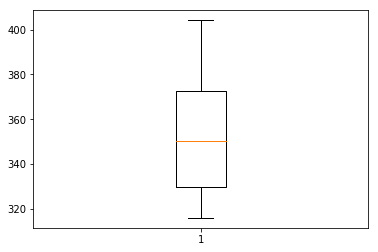

In [5]:
plt.boxplot(df["CO2(ppm)"])

Text(0.5,1,'DJIA')

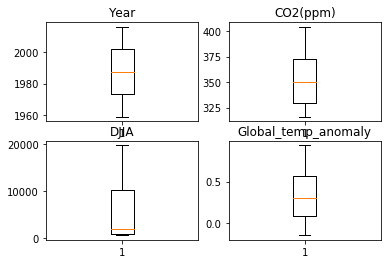

In [6]:
plt.figure()
plt.subplot(2,2,1)
plt.boxplot(df["year"])
plt.title("Year")

plt.subplot(2,2,2)
plt.boxplot(df["CO2(ppm)"])
plt.title("CO2(ppm)")

plt.subplot(2,2,4)
plt.boxplot(df["Global_temp_anomaly"])
plt.title("Global_temp_anomaly")

plt.subplot(2,2,3)
plt.boxplot(df["DJIA"])
plt.title("DJIA")


            ## Etude des differences rélations intervariables

In [7]:
import pandas 
import numpy as np
#   MATRICE DE CORRELATIONS
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,Global_temp_anomaly,CO2(ppm),DJIA
year,1.000000,0.934291,0.992585,0.894204
Global_temp_anomaly,0.934291,1.000000,0.947305,0.895576
CO2(ppm),0.992585,0.947305,1.000000,0.931917
DJIA,0.894204,0.895576,0.931917,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f659c51e6d8>,
      dtype=object)

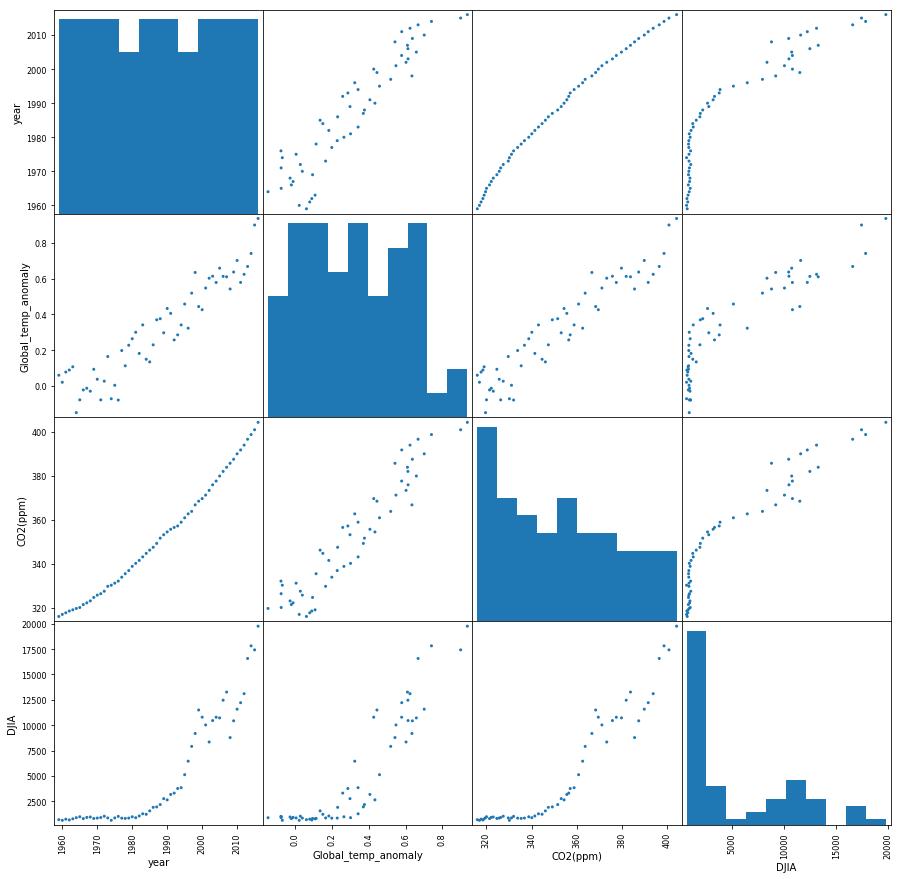

In [8]:
import pandas
pandas.plotting.scatter_matrix(df,diagonal='hist',figsize=(15,15),alpha=1)

## Allure des données de la base

### 1. Température en fonction du taux de CO2 en fonction des années

### 2.     Les Années en fonction de leurs température moyenne en fonction de leurs taux de CO2(ppm)

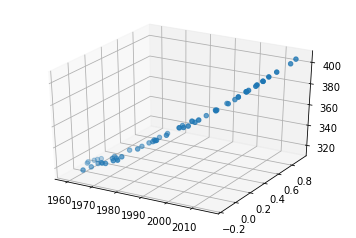

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["year"],df["Global_temp_anomaly"],df["CO2(ppm)"])

plt.show()

## APPROCHE LINEAIRE

            ### 1.   PREMIER MODELE DE REGRESSION LINÉAIRE: Régression du taux de CO2 dans l'air sur les années


            #### Evolution du CO2(ppm) en fonction des années

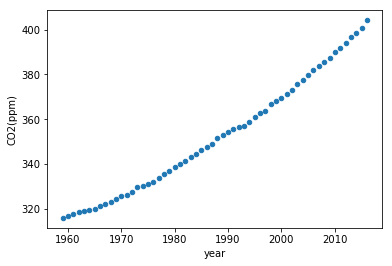

In [10]:
df.plot.scatter("year","CO2(ppm)")

###    Réalisation de la régression

[[1.53706881]] [-2702.35857363]
Modele est: t |--> 1.54*t - 2702.36


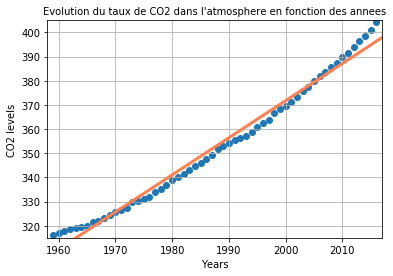

In [11]:
from sklearn import linear_model

import matplotlib.pyplot as plt
import numpy as np
import random

#----------------------------------------------------------------------------------------#
# Step 1: Préparation de données

#print(CO2_ppm)
#print(Global_temp_anomaly)
Y = df["CO2(ppm)"]
X = df["year"]

X = np.asarray(X)
Y = np.asarray(Y)

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

plt.scatter(X,Y)

#----------------------------------------------------------------------------------------#
# Step 2: Définition du modèle avec Sklearn

model = linear_model.LinearRegression()
model.fit(X, Y)

print(model.coef_, model.intercept_)
var('t')
f(t)=(round(float(model.coef_),2))*t + round(float(model.intercept_),2)
print("Modele est:",f)

#----------------------------------------------------------------------------------------#
# Step 3: Prédiction

x_new_min = 1958
x_new_max = 2017

X_NEW = np.linspace(x_new_min, x_new_max, 100)
X_NEW = X_NEW[:,np.newaxis]

Y_NEW = model.predict(X_NEW)

plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min,x_new_max)
plt.ylim(315,405)

plt.title("Evolution du taux de CO2 dans l'atmosphere en fonction des annees",fontsize=10)
plt.xlabel('Years')
plt.ylabel('CO2 levels')

plt.savefig("CO2 et annees.png", bbox_inches='tight')
plt.show()



####   Evaluation du modèle

In [12]:
print('le model explique la realite a :',round(model.score(X,Y)*100,2),'%')

le model explique la realite a : 98.52 %


####   Prédictions

In [13]:
#Prédiction
print("Theoriquement en 2040,le volume de CO2 dans l'air avoisinerait :",round(float(model.predict(np.reshape(2040,(1,-1)))),2),"ppm")

Theoriquement en 2040,le volume de CO2 dans l'air avoisinerait : 433.26 ppm


        ###  DEUXIEME MODELE:
        REGRESSION DE L'EVOLUTION DE LA TEMPERATURE MOYENNE DE LA TERRE ANNUELLE SUR LE TAUX DE CO2 ANNUEL

####   Evolution de la température moyenne de la terre en fonction du taux de CO2 annuel observé 

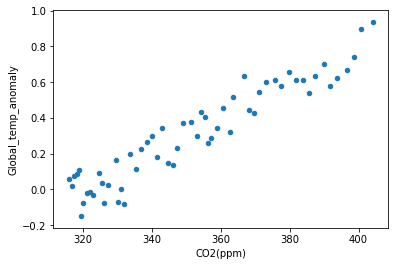

In [14]:
df.plot.scatter("CO2(ppm)","Global_temp_anomaly")


####  Réalisation 

[[0.00991792]] [-3.17932999]
Modele est: t |--> 0.01*h - 3.18

Le pourcentage de la realite est de : 89.73867970718032 % 



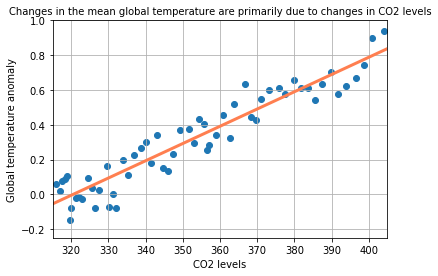

In [15]:
from sklearn import linear_model

import matplotlib.pyplot as plt
import numpy as np
import random

#----------------------------------------------------------------------------------------#
# Step 1: Préparation de données

#print(CO2_ppm)
#print(Global_temp_anomaly)
X = df["CO2(ppm)"]
Y = df["Global_temp_anomaly"]

X = np.asarray(X)
Y = np.asarray(Y)

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

plt.scatter(X,Y)

#----------------------------------------------------------------------------------------#
# Step 2: Définition du modèle avec Sklearn

model = linear_model.LinearRegression()
model.fit(X, Y)

print(model.coef_, model.intercept_)
var('h')
f(t)=(round(float(model.coef_),2))*h + round(float(model.intercept_),2)
print('Modele est:',f)
print('\nLe pourcentage de la realite est de :',float(model.score(X,Y))*100,'% \n')

#----------------------------------------------------------------------------------------#
# Step 3: Prédiction

x_new_min = 315
x_new_max = 405

X_NEW = np.linspace(x_new_min, x_new_max, 100)
X_NEW = X_NEW[:,np.newaxis]

Y_NEW = model.predict(X_NEW)

plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min,x_new_max)
plt.ylim(-0.25,1)

plt.title("Changes in the mean global temperature are primarily due to changes in CO2 levels",fontsize=10)
plt.xlabel('CO2 levels')
plt.ylabel('Global temperature anomaly')

plt.savefig(".png", bbox_inches='tight')
plt.show()


####  Evaluation du modèle

In [16]:
print('le model explique la realite a :',round(model.score(X,Y)*100,2),'%')

le model explique la realite a : 89.74 %


####  Pétite Prédiction

In [17]:
print('Theoriquement en 2040,le volume de CO2 dans l air attendrait 433.26 ppm, donc la temperature moyenne de la terre attendrait  les ',round(float(model.predict(np.reshape(433.26,(1,-1)))),2),'degre Celsus')

Theoriquement en 2040,le volume de CO2 dans l air attendrait 433.26 ppm, donc la temperature moyenne de la terre attendrait  les  1.12 degre Celsus


In [18]:
max(df["DJIA"])

19762.6

         #### REPONSE A LA QUESTION:
         Peut-on prédire l'evolution de la température moyenne mondiale en fonction de l'evolution de l'indice des bourses de New York(DJIA:le plus vieil indice boursier du monde)?

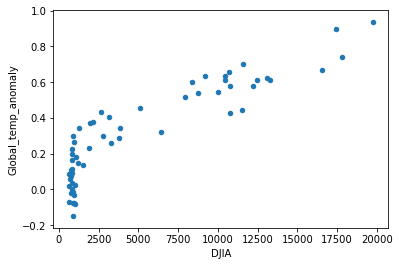

In [19]:
df.plot.scatter("DJIA","Global_temp_anomaly")

#####   Régression  de l'évolution de la température moyenne terrestre sur Le DJIA

[[4.44440088e-05]] [0.08421596]
Modele est: t |--> 0.08

Le pourcentage de la realite est de : 80.20564339718746 % 



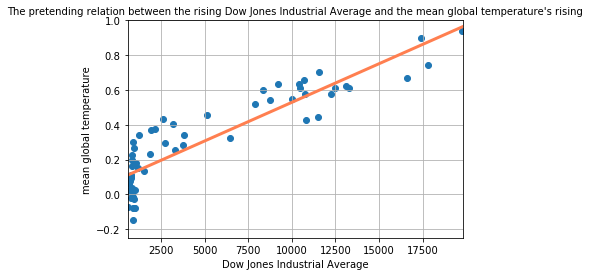

In [20]:
from sklearn import linear_model

import matplotlib.pyplot as plt
import numpy as np
import random

#----------------------------------------------------------------------------------------#
# Step 1: Préparation de données

#print(CO2_ppm)
#print(Global_temp_anomaly)
X = df["DJIA"]
Y = df["Global_temp_anomaly"]

X = np.asarray(X)
Y = np.asarray(Y)

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

plt.scatter(X,Y)

#----------------------------------------------------------------------------------------#
# Step 2: Définition du modèle avec Sklearn

model = linear_model.LinearRegression()
model.fit(X, Y)

print(model.coef_, model.intercept_)
var('t')
f(t)=(round(float(model.coef_),2))*t + round(float(model.intercept_),2)
print('Modele est:',f)
print('\nLe pourcentage de la realite est de :',float(model.score(X,Y))*100,'% \n')

#----------------------------------------------------------------------------------------#
# Step 3: Prédiction

x_new_min = 615.89-20
x_new_max = 19762.6+20

X_NEW = np.linspace(x_new_min, x_new_max, 100)
X_NEW = X_NEW[:,np.newaxis]

Y_NEW = model.predict(X_NEW)

plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min,x_new_max)
plt.ylim(-0.25,1)

plt.title("The pretending relation between the rising Dow Jones Industrial Average and the mean global temperature's rising",fontsize=10)
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('mean global temperature')

plt.savefig(".png", bbox_inches='tight')
plt.show()



####   Evaluation du modèle

In [21]:
print('le score du modèle sur 100 est de :',round(model.score(X,Y)*100,2))

le score du modèle sur 100 est de : 80.21


#### Conclusion:        
On peut dire avec certitude qu'il y a une relation quoique pas très bonne entre la hausse des indices boursiers et celle de la temperature moyenne mondiale annuelle.En effet la hausse des indices provient de l'augmentation de la production , donc de la pollution(taux de CO2 libéré dans l'air augmente) donc la température mondiale augmente

        ###    4.    Modele de regression multiple

In [22]:
from sklearn import linear_model

import matplotlib.pyplot as plt
import numpy as np
import random

X = df[["year","CO2(ppm)"]]
y = df["Global_temp_anomaly"]
lm = linear_model.LinearRegression()
lm.fit(X,y)
var('a')
var('b')
model=float(lm.coef_[0])*a+float(lm.coef_[1])*b+float(lm.intercept_)
model

-0.006572684982426868*a + 0.01413085897982903*b + 8.398545016102405

In [23]:
lm.predict([[2040,433.26]])#Ceci confirme bien le résultat trouvé précédemment

array([1.11260361])

In [24]:
df

,year,Global_temp_anomaly,CO2(ppm),DJIA
0,1959,0.0596,315.97,679.36
1,1960,0.0204,316.91,615.89
2,1961,0.0775,317.64,731.14
3,1962,0.0888,318.45,652.10
4,1963,0.1068,318.99,762.95
5,1964,-0.1495,319.62,874.13
6,1965,-0.0780,320.04,969.26
7,1966,-0.0227,321.38,785.69
8,1967,-0.0131,322.16,905.11
9,1968,-0.0296,323.04,943.75


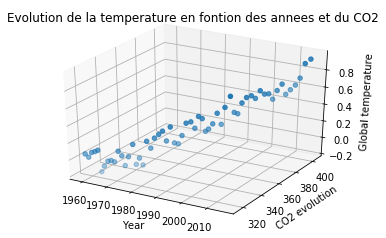

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["year"],df["CO2(ppm)"],df["Global_temp_anomaly"])
ax.set_xlabel('Year')
ax.set_ylabel('CO2 evolution')
ax.set_zlabel('Global temperature')
plt.title("Evolution de la temperature en fontion des annees et du CO2")

#plt.xlabel("Year")
#plt.ylabel("CO2 evolution")
#plt.zlabel("Global temperature")
plt.show()

In [26]:
max(df["Global_temp_anomaly"])-min(df["Global_temp_anomaly"])

1.0858

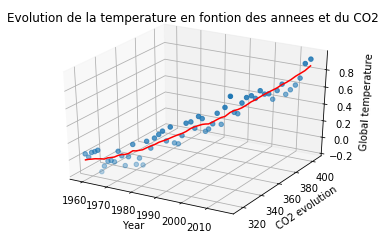

In [27]:
from numpy import *
from matplotlib.pyplot import *
x=array(df["year"])
y=array(df["CO2(ppm)"])
z=-0.006572684982426868*x + 0.01413085897982903*y + 8.398545016102405

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 evolution')
ax.set_zlabel('Global temperature')
ax.scatter(df["year"],df["CO2(ppm)"],df["Global_temp_anomaly"])
gca(projection='3d').plot(x,y,z,color="red")
plt.title("Evolution de la temperature en fontion des annees et du CO2")
plt.show()


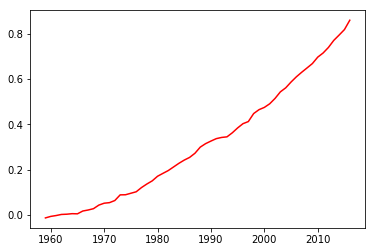

In [28]:
plot(x,z,color="red")

####   Evaluation du modèle

In [29]:
print(round(lm.score(X,Y)*100,2),"%")

89.98 %


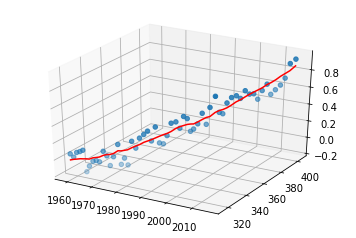

In [30]:
#brut
from numpy import *
from matplotlib.pyplot import *
x=array(df["year"])
y=array(df["CO2(ppm)"])
z=-0.006572684982426868*x + 0.01413085897982903*y + 8.398545016102405

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["year"],df["CO2(ppm)"],df["Global_temp_anomaly"])
gca(projection='3d').plot(x,y,z,color="red")
plt.show()

#gca(projection='3d').plot(x,y,z)

    ##   Analyse de la composante principale        
    

###   De la Standardisation des données aux cartes d'individus et de variables(Centrage)

[-1.91417763e-17  1.76104342e-16  1.41649145e-15 -1.45477500e-16]
[1. 1. 1. 1.]
PCA(svd_solver='full')
4
[3.86540666e+00 1.23541433e-01 7.83731830e-02 2.85416011e-03]
[3.79876172e+00 1.21411408e-01 7.70219212e-02 2.80495045e-03]
[3.79876172e+00 1.21411408e-01 7.70219212e-02 2.80495045e-03]
[9.49690430e-01 3.03528521e-02 1.92554803e-02 7.01237613e-04]


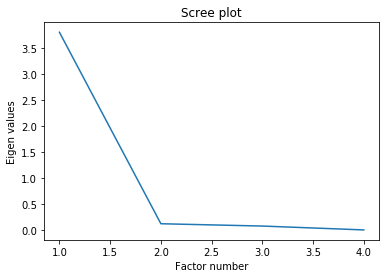

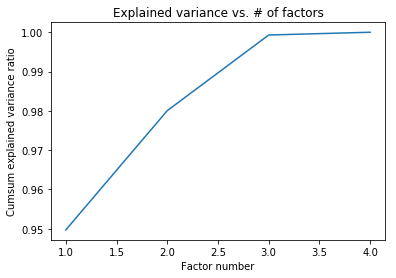

   Val.Propre    Seuils
0    3.798762  2.083333
1    0.121411  1.083333
2    0.077022  0.583333
3    0.002805  0.250000


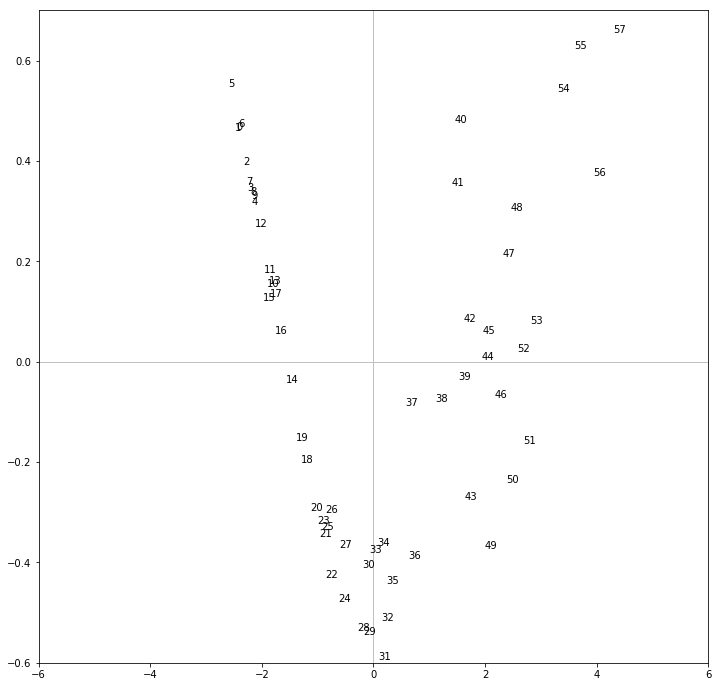

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1.]
[[ 0.50319789  0.49719462  0.50977485  0.48961106]
 [-0.41322459 -0.26239088 -0.15956552  0.85728368]
 [ 0.46103987 -0.82618494  0.3224864   0.02938039]
 [ 0.60289266  0.03697266 -0.78145439  0.15646884]]
[[ 0.98075343 -0.14398455  0.12795158  0.03193027]
 [ 0.96905282 -0.09142785 -0.22928965  0.00195814]
 [ 0.99357221 -0.05559923  0.08949908 -0.04138722]
 [ 0.95427214  0.29871312  0.00815389  0.00828687]]
                    id     COR_1     COR_2
0                 year  0.980753 -0.143985
1  Global_temp_anomaly  0.969053 -0.091428
2             CO2(ppm)  0.993572 -0.055599
3                 DJIA  0.954272  0.298713


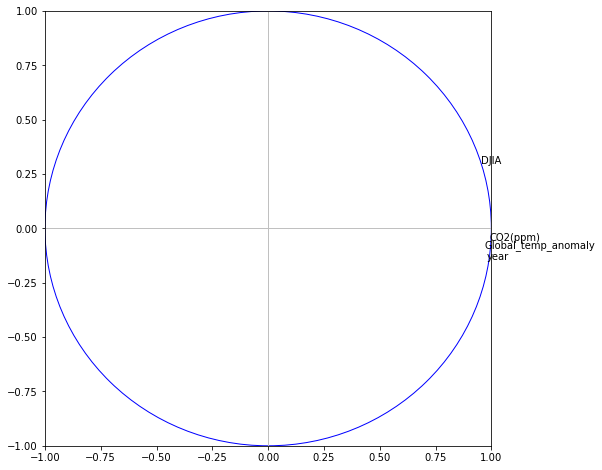

In [31]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(df)
#print(Z)
#vérification - librairie numpy
import numpy
#moyenne
print(numpy.mean(Z,axis=0))
#écart-type
print(numpy.std(Z,axis=0,ddof=0))
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)
#calculs
coord = acp.fit_transform(Z)
coord
#nombre de composantes calculées
print(acp.n_components_) 
#variance expliquée
print(acp.explained_variance_)
n=df.shape[0]
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)
#proportion de variance expliquée
print(acp.explained_variance_ratio_)
#Choix du nombre d'axes
#scree plot
p=df.shape[1]
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()
#cumul de variance expliquée
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
print(pandas.DataFrame({'Val.Propre':eigval,'Seuils':bs}))
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-0.6,0.7) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(df.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-0.6,0.7],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()
import numpy
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
#print(pandas.DataFrame({'ID':df.index,'d_i':di}))
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
#print(pandas.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))
#vérifions la théorie - somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

#print(pandas.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))
#vérifions la théorie
print(numpy.sum(ctr,axis=0))
#le champ components_ de l'objet ACP
print(acp.components_)
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)
#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)
#on affiche pour les deux premiers axes
print(pandas.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(df.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()



In [32]:
max(df["DJIA"])
#df["CO2(ppm)"]

19762.6

In [33]:
from sklearn import linear_model

import matplotlib.pyplot as plt
import numpy as np

X = df[["year","DJIA"]]
y = df["CO2(ppm)"]
lm = linear_model.LinearRegression()
lm.fit(X,y)
#var('x')
#var('z')
#model=float(lm.coef_[0])*x+float(lm.coef_[1])*z+float(lm.intercept_)
#model

LinearRegression()

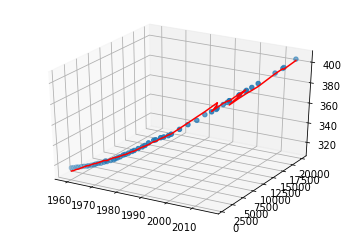

In [34]:
#brut
from numpy import *
from matplotlib.pyplot import *
x=array(df["year"])
y=array(df["DJIA"])
z=lm.coef_[0]*x + lm.coef_[1]*y + lm.intercept_

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["year"],df["DJIA"],df["CO2(ppm)"])
gca(projection='3d').plot(x,y,z,color="red")
plt.show()

#gca(projection='3d').plot(x,y,z)

In [35]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

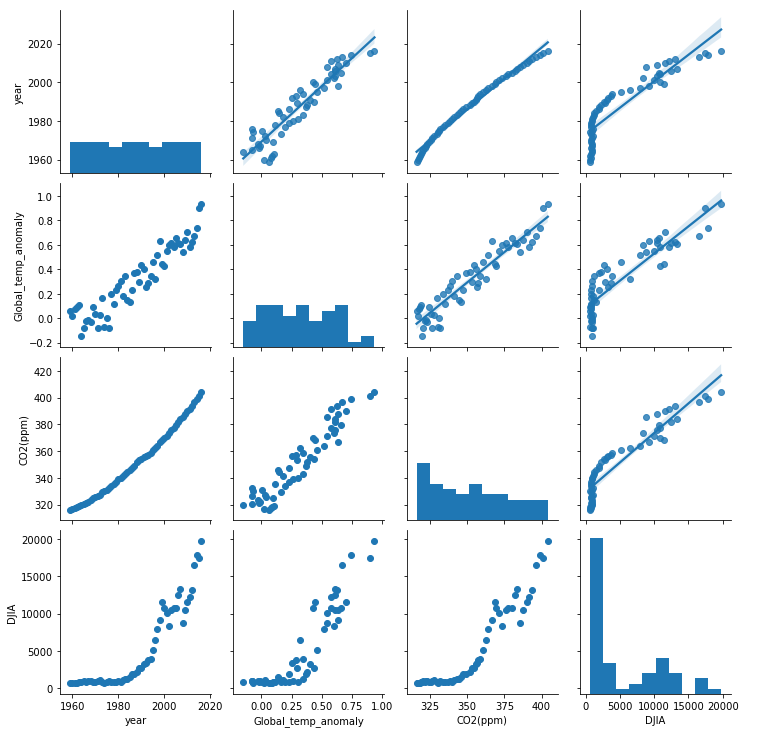

In [36]:
#logdb = pd.concat([np.log10(db.ix[:,2:9])], 
 #              axis=1).replace([np.inf, - np.inf],
#                             np.nan).dropna()
g = sns.PairGrid(df)
g.map_upper(sns.regplot) 
g.map_lower(plt.scatter)
g.map_diag(plt.hist)  
plt.show()